##Análise Estatística sobre Planos de Governos de Candidatos a Presidentes do Brasil em 2022

###Disciplina: Tópicos Avançados em Ciência de Dados e IA
###Aluno: Robson Luis Silva

###***Trabalho realizado via GOOGLE COLAB***

In [ ]:
def salva_tabela(ArquivoPdf):
    #salva tabela em csv com o mesmo nome do arquivo pdf removendo a extensão
    df = vendotabela(ArquivoPdf)
    nome_arquivo = ArquivoPdf.split('.')[0]
    df.to_csv('{}.csv'.format(nome_arquivo), index=False)
    print('Arquivo salvo com sucesso')

In [1]:
#Instalando a biblioteca do pdfplumber, para trabalharmos com arquivos em formato pdf
#!pip install pdfplumber

In [2]:
#Importanto as bibliotecas necessárias para os processamentos e visualizações de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pdfplumber    
import re 
from PIL import Image                                                                                               
from collections import Counter
import networkx as nx
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def func_analise(ArquivoPdf, candidato):
    pdf = pdfplumber.open('/content/planos_de_governo/' + ArquivoPdf + '.pdf')
    contapage = len(pdf.pages)
    print(f'O arquivo PDF do Candidato {candidato} tem {contapage} páginas')
    print()
    print('Aqui vai pequeno Trecho da proposta de Governo do candidato:')
    print()
    print(pdf.pages[5].extract_text())

In [41]:
#criar lista de candidados a partir dos arquivos pdf da pasta planos_de_governo
def criar_lista():
    lista = []
    for file in os.listdir('/content/planos_de_governo/'):
        if file.endswith('.pdf'):
            lista.append(file)
    #remover o .pdf do nome do arquivo
    lista = [x.replace('.pdf', '') for x in lista]
    return lista

In [40]:
#Realizando tratamento dos texto para retirar os caracteres especiais
def tratamento_texto(ArquivoPdf):
    texto_limpo = []
    pdf = pdfplumber.open(ArquivoPdf)
    contapage = len(pdf.pages)
    texto = ''
    for i in range(contapage):
        texto += pdf.pages[i].extract_text()
    texto = texto.lower()
    texto = re.sub(r'[^a-zA-Z\s]', '', texto, re.I | re.A)
    texto = re.findall(r'\w+', texto)
    for palavra in texto:
        if (palavra not in stopwords) & (len(palavra) > 3):
            texto_limpo.append(palavra)
    testo_limpo = texto_limpo.sort()
    texto_limpo = ' '.join(texto_limpo)
    texto_limpo = texto_limpo.strip()
    return texto_limpo

In [42]:
def vendotabela(ArquivoPdf):
    texto = tratamento_texto('/content/planos_de_governo/' + ArquivoPdf + '.pdf')
    palavras = texto.split()
    contagem = Counter(palavras)
    df = pd.DataFrame(contagem.most_common(20), columns=['Palavras', 'Contagem'])
    return df

In [43]:
#lista de candidatos criadas
candidatos = criar_lista()
candidatos

['eymael',
 'vera',
 'jefferson',
 'soraya',
 'simone',
 'bolsonaro',
 'lula',
 'ciro',
 'leonardo',
 'davila',
 'marcal',
 'sofia']

In [8]:
def plota_wordcloud(ArquivoPdf,candidato):
    # criar wordcloud sem palavras duplicadas
    candidato = candidato.capitalize()
    texto = tratamento_texto('/content/planos_de_governo/' + ArquivoPdf + '.pdf')
    wordcloud = WordCloud(width=800, height=500,max_font_size=110, collocations=False).generate(texto)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f'Candidato {candidato}')
    plt.axis('off')
    plt.show()

In [9]:
def plotar_grafico(ArquivoPdf, candidato):
    candidato = candidato.capitalize()
    df = vendotabela(ArquivoPdf)
    df.plot.bar(x='Palavras', y='Contagem', figsize=(10, 7))
    plt.title(f'Candidato {candidato}')
    plt.show()

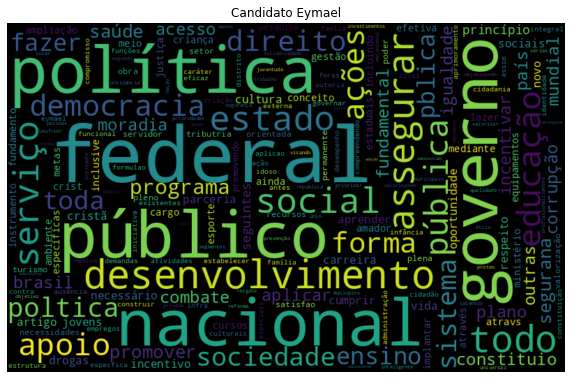

In [10]:
#Nuvem de plavra do plano de governo de Constituinte Eymael - DC
plota_wordcloud(candidatos[0], candidatos[0])

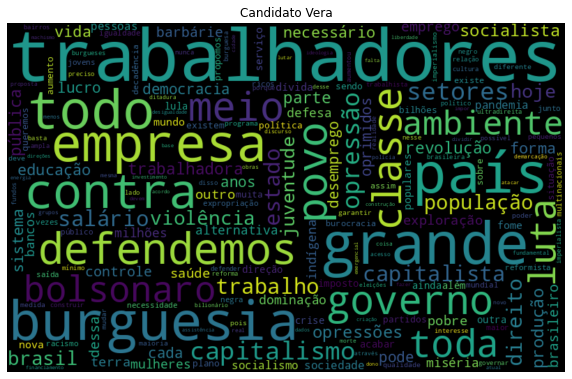

In [11]:
#Nuvem de plavra do plano de governo de Vera - PSTU
plota_wordcloud(candidatos[1], candidatos[1])

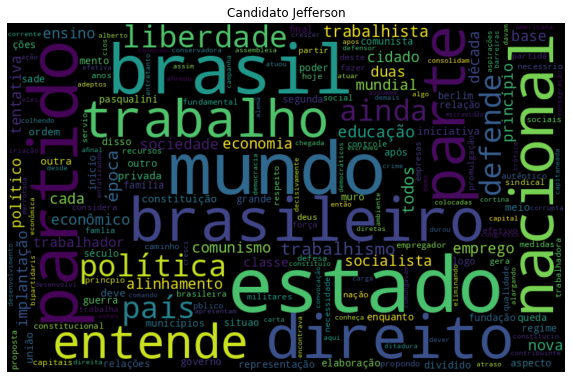

In [12]:
#Nuvem de plavra do plano de governo de Roberto Jefferson - PTB
plota_wordcloud(candidatos[2], candidatos[2])

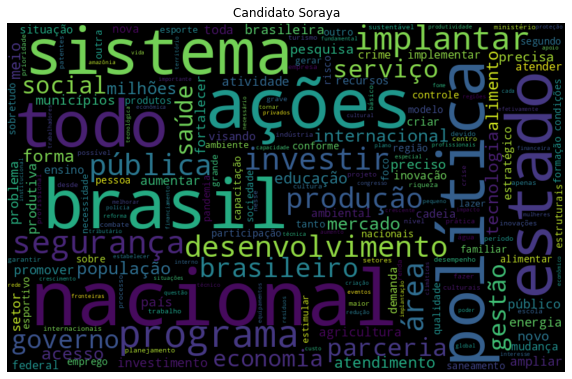

In [13]:
#Nuvem de plavra do plano de governo de Soraya Thronicke - União Brasil
plota_wordcloud(candidatos[3], candidatos[3])

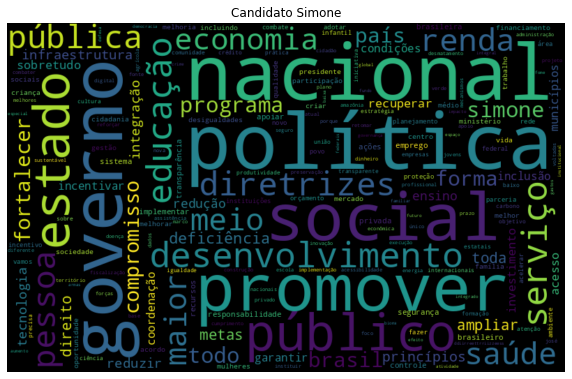

In [14]:
#Nuvem de plavra do plano de governo de Simone Tebet (MDB)
plota_wordcloud(candidatos[4], candidatos[4])

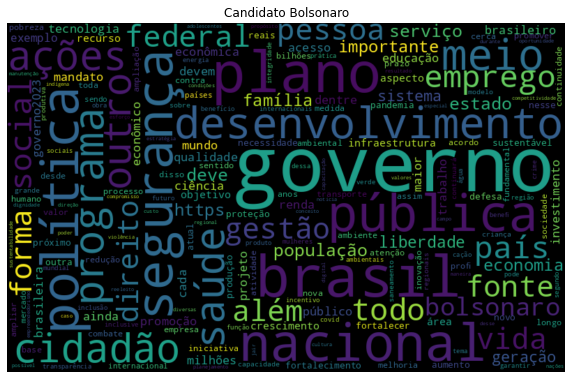

In [15]:
#Nuvem de plavra do plano de governo de Jair Bolsonaro - PL
plota_wordcloud(candidatos[5], candidatos[5])

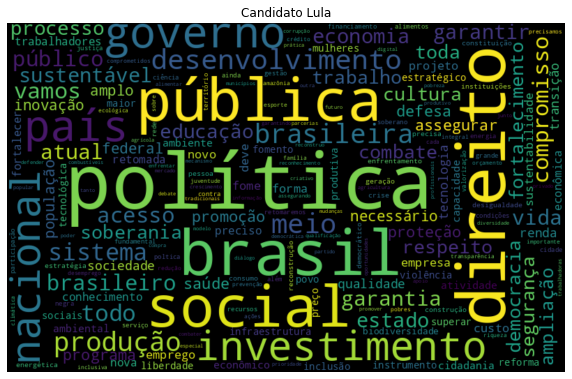

In [16]:
#Nuvem de plavra do plano de governo de Lula - PT
plota_wordcloud(candidatos[6], candidatos[6])

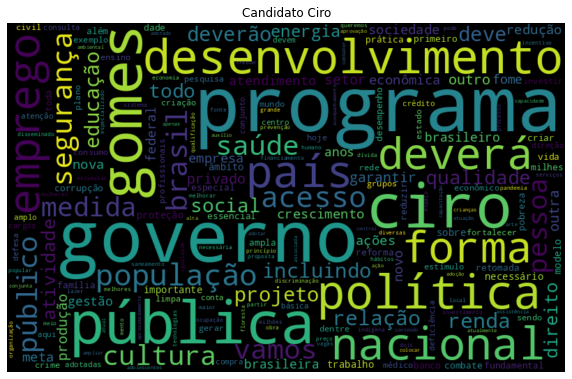

In [17]:
#Nuvem de plavra do plano de governo de Ciro Gomes - PDT
plota_wordcloud(candidatos[7], candidatos[7])

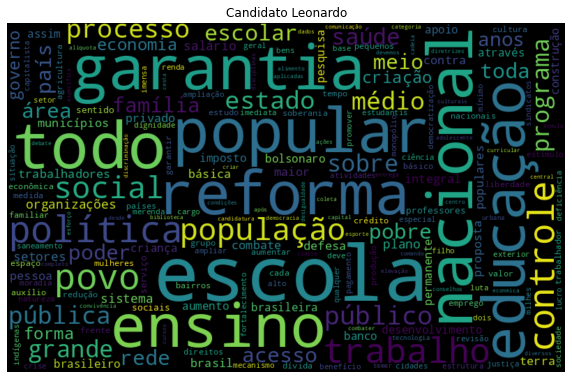

In [18]:
#Nuvem de plavra do plano de governo de Lenardo Péricles - PUP
plota_wordcloud(candidatos[8], candidatos[8])

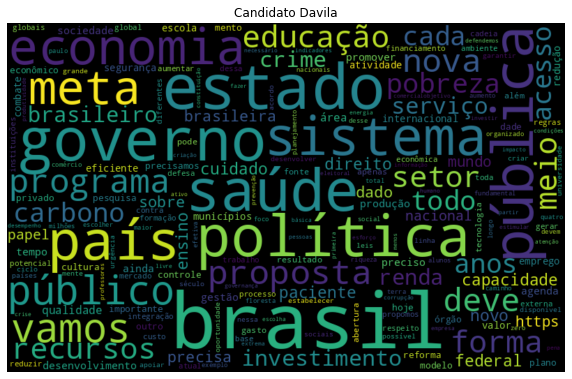

In [19]:
#Nuvem de plavra do plano de governo de Felipe DÁvila - Novo
plota_wordcloud(candidatos[9], candidatos[9])

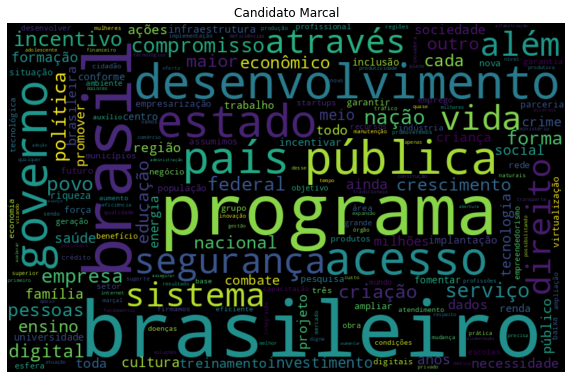

In [20]:
#Nuvem de plavra do plano de governo de Pablo Marçal - Pros
plota_wordcloud(candidatos[10], candidatos[10])

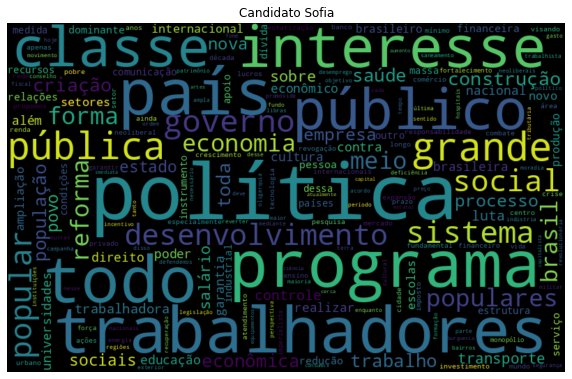

In [21]:
#Nuvem de plavra do plano de governo de Sofia Manzano - PCB
plota_wordcloud(candidatos[11], candidatos[11])

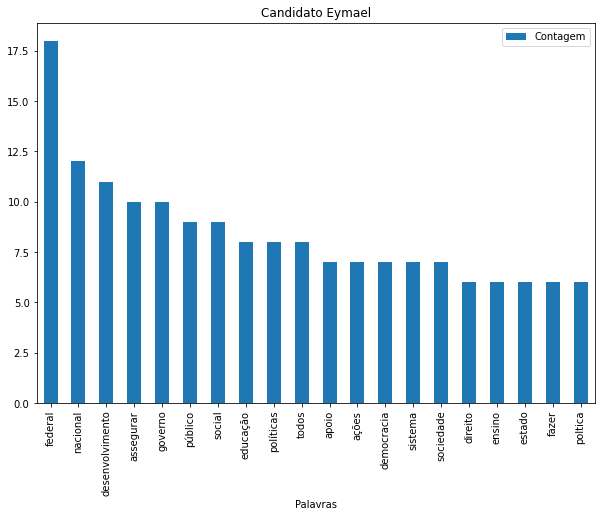

In [22]:
plotar_grafico(candidatos[0], candidatos[0])

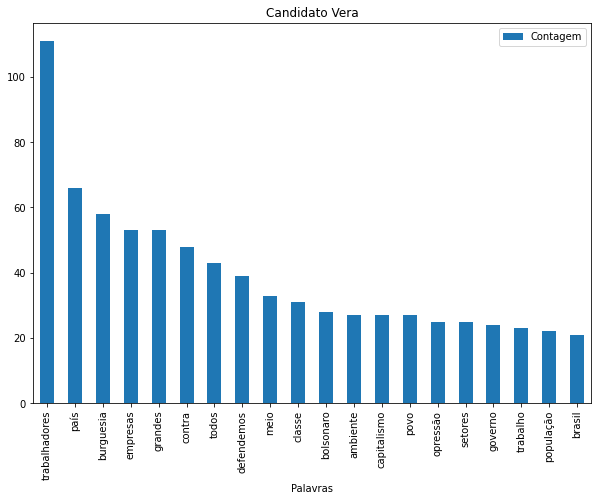

In [23]:
plotar_grafico(candidatos[1], candidatos[1])

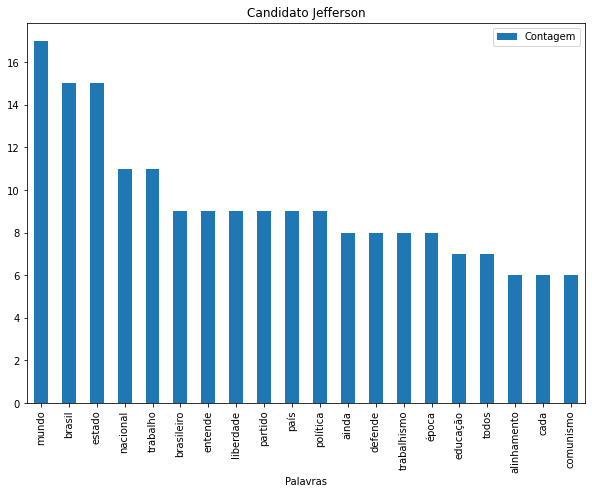

In [24]:
plotar_grafico(candidatos[2], candidatos[2])

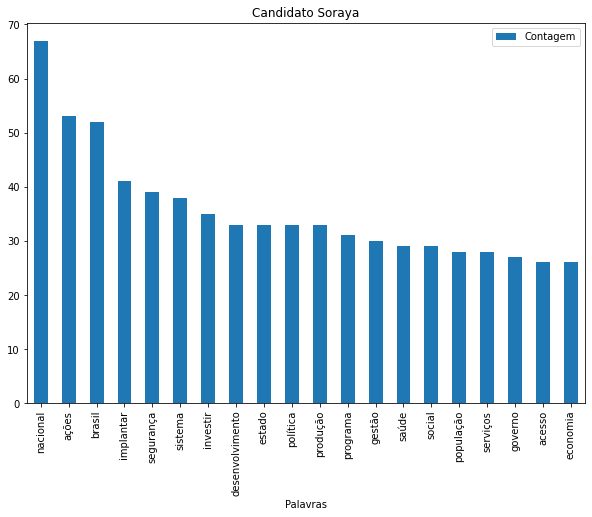

In [25]:
plotar_grafico(candidatos[3], candidatos[3])

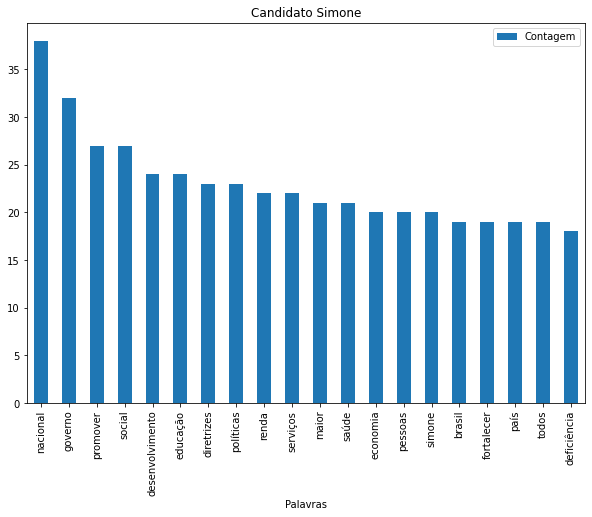

In [26]:
plotar_grafico(candidatos[4], candidatos[4])

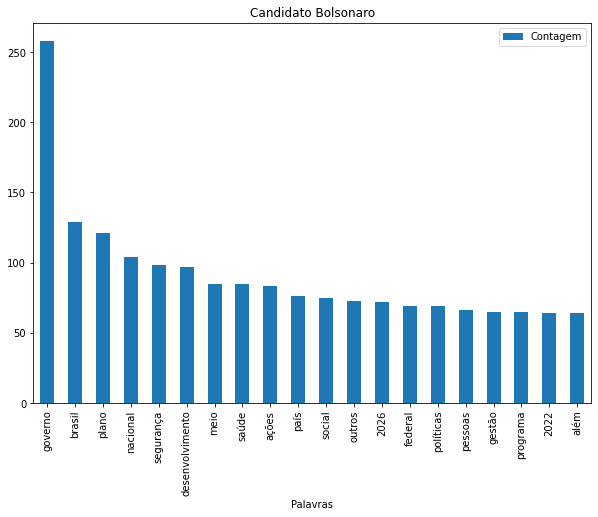

In [27]:
plotar_grafico(candidatos[5], candidatos[5])

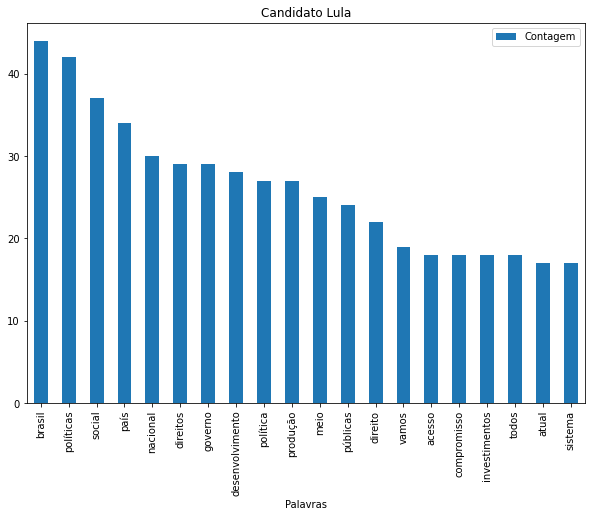

In [28]:
plotar_grafico(candidatos[6], candidatos[6])

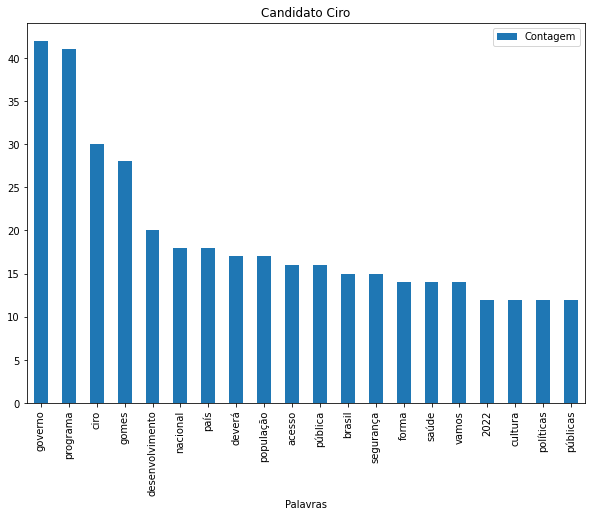

In [29]:
plotar_grafico(candidatos[7], candidatos[7])

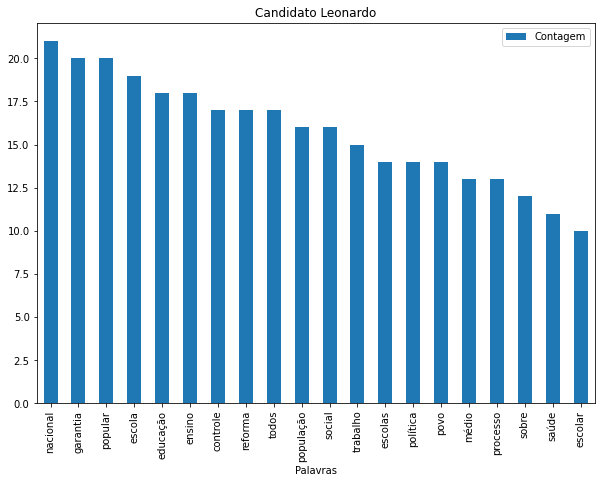

In [30]:
plotar_grafico(candidatos[8], candidatos[8])

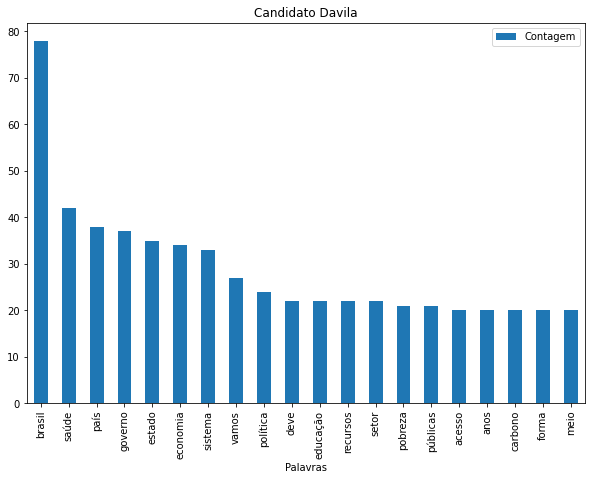

In [31]:
plotar_grafico(candidatos[9], candidatos[9])

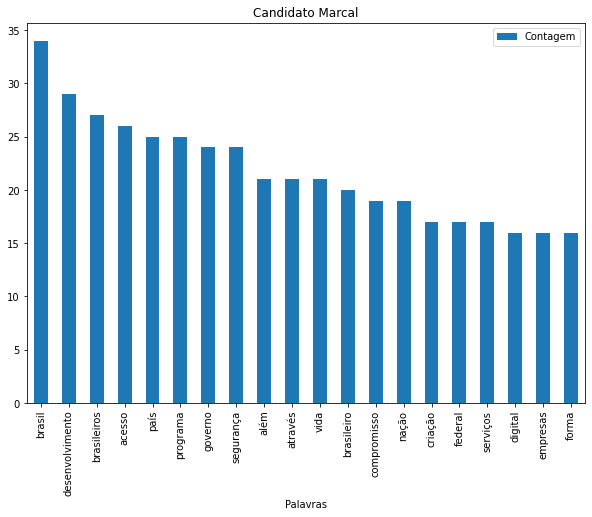

In [32]:
plotar_grafico(candidatos[10], candidatos[10])

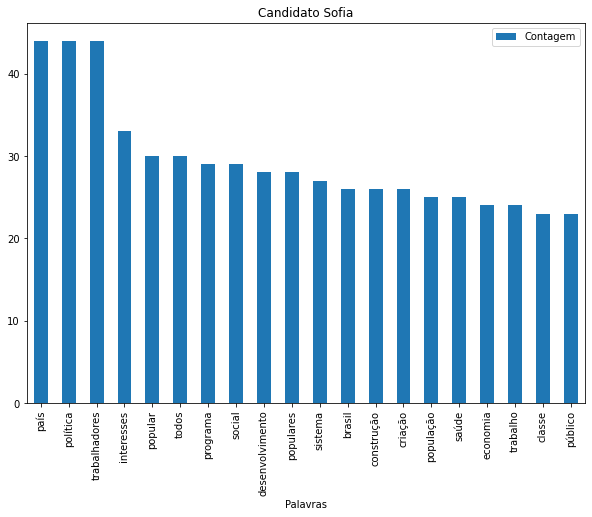

In [33]:
plotar_grafico(candidatos[11], candidatos[11])